In [0]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/CF_C"

/content/drive/My Drive/Colab Notebooks/CF_C


**Part #2 - Revenue per device analysis (Excel)**

In [25]:
#Importing data
df_task1 = pd.read_csv('task1.csv', parse_dates=['device_install_date'])
df_task1.head()

,device_id,device_install_date,country,total_revenue
0,FD80F264-5F61-4244-A9C7-5657E38A45A8,2019-08-11,US,3.14
1,160B8148-4541-4FEE-97BB-A333EEF3EDAE,2019-08-11,US,10.05
2,B470E082-29D9-4FED-BC7A-83906425855C,2019-08-11,US,11.95
3,559E65BB-AB4A-4CB2-AB54-60B8C47FCFD8,2019-08-11,US,0.00
4,307C26F6-F4BD-4A5B-AF9F-5678EAA29494,2019-08-11,AU,0.00


In [26]:
#sorting by total_revenue, 10 highest values come from US
df_task1.sort_values('total_revenue', ascending=False).head(10)

,device_id,device_install_date,country,total_revenue
27870,E5B3407C-E440-414F-A63C-C9BDDD415EAD,2019-12-12,US,453.75
11440,721EFF7C-85FA-493E-98C2-241D3703CACF,2019-10-13,US,178.79
8247,2EA532C9-F8D1-43D2-A8BD-73E939C17596,2019-09-27,US,148.10
27925,C0965EFD-096D-4E59-8407-7F9420158B64,2019-12-12,US,124.62
35010,EC4B3080-08B9-4F58-A47B-D5BE94081A93,2020-01-07,US,120.00
34496,2578199E-8BAE-445C-9E03-D6286A11D111,2020-01-05,US,117.72
7807,CECD6914-07D6-4751-AAF8-03AC5BD6490B,2019-09-24,US,106.24
22210,A56E4414-E371-4AF5-AE31-812DCD376F30,2019-11-29,US,96.31
27714,949BC1C1-5ED0-45DE-8195-C8D2949475AF,2019-12-12,US,90.66
19630,F8AD4945-4D55-4147-973B-27104E4E0008,2019-11-22,US,88.98


In [0]:
#Calculating Mode for all devices
print (st.mode(df_task1.total_revenue))

0.0


In [0]:
#Mean and std (additionaly min, max and percentiles) for all devices
df_task1.describe()

,total_revenue,month
count,42089.000000,42089.000000
mean,0.344027,8.538122
std,3.664971,3.990929
min,0.000000,1.000000
25%,0.000000,8.000000
50%,0.000000,10.000000
75%,0.000000,11.000000
max,453.750000,12.000000


In [0]:
#94% of all devices didn't bring any revenue
df_task1.total_revenue.value_counts(normalize=True)[0]

0.9407921309605836

Presenting on histogram how right skewed is distibution - majority of deivices (94%) didn't generate any revenue (mode is 0), 
mean is very low (0.344) and is influenced by a few high values up to 453.75 (but I wouldn't call them outliers)  

(array([4.2059e+04, 2.2000e+01, 5.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.   ,  45.375,  90.75 , 136.125, 181.5  , 226.875, 272.25 ,
        317.625, 363.   , 408.375, 453.75 ]),
 <a list of 10 Patch objects>)

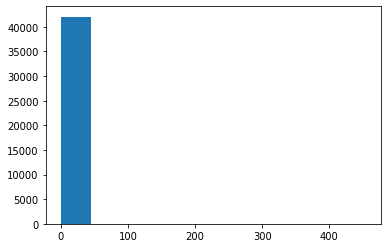

In [0]:
plt.hist(df_task1.total_revenue)

When we take just 5 countries we cover more than 80%
 devices.



In [27]:
df_task1.country.value_counts(normalize=True)

US    0.624929
GB    0.082541
CA    0.066218
AU    0.033881
RU    0.024449
        ...   
MR    0.000024
ZM    0.000024
RW    0.000024
SD    0.000024
VG    0.000024
Name: country, Length: 161, dtype: float64

In [0]:
df_task1_f = df_task1[df_task1["country"].isin(["US", "GB", "CA", "AU", "RU"])]

In [30]:
for country in df_task1_f.country.unique():
  print ("Mode of " + str(country) + " is " + str(st.mode(df_task1_f[df_task1.country==country].total_revenue)))

Mode of US is 0.0
Mode of AU is 0.0
Mode of RU is 0.0
Mode of GB is 0.0
Mode of CA is 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


We neet to be carreful when looking at stats - mode for PW (Palau?) was 52.55. Impressive?
Not really when you check that there was just one device (but with quite high revenue)
It's one of the reasons I decided to work on filtered list of countries.

In [121]:
print(st.mode(df_task1[df_task1["country"]=="PW"].total_revenue))

52.55


In [0]:
df_task1[df_task1.country=='PW'].head()

,device_id,device_install_date,country,total_revenue,month
7383,A1C48062-29C2-4A16-8B08-C38220DEF283,2019-09-22,PW,52.55,9


First and most obvious  - in this dataset devices mostly come from US. Those devices also bring highest revenue (looking at average) but has the highest standard deviaton - it simply shows largest revenue range (you can see that also when looking at maximum values for countries). When we look at mode for those 5 countries it's 0 as the most common value is 0.

In [31]:
print (df_task1_f.groupby('country').describe().unstack(1))

                      country
total_revenue  count  AU          1426.000000
                      CA          2787.000000
                      GB          3474.000000
                      RU          1029.000000
                      US         26302.000000
               mean   AU             0.046396
                      CA             0.111285
                      GB             0.083414
                      RU             0.019932
                      US             0.497724
               std    AU             0.584708
                      CA             1.103669
                      GB             1.242848
                      RU             0.552168
                      US             4.532155
               min    AU             0.000000
                      CA             0.000000
                      GB             0.000000
                      RU             0.000000
                      US             0.000000
               25%    AU             0.000000
    

**What do we get from this simply descriptive statistics?** 

We know our main markets and how revenue is distributed. Majority of devices didn't bring us any revenue (mean value isn't the best choice to describe our situation), but there are some nice results worth further investigation (top results).<br>

**What could we do else?** <br>
Do timeseries analysis - check if there are trends in time/ seasonality. <br>
If we have number of transactions in time we could check what brings income - many small purchases or less but bigger? <br>
If have dates of transaction if people install just before purchase or install and do shopping later? <br>
What is churn rate? How quickly people de-install? I'm just wondering if there is a group of people who install before bigger purchase and de-install immediately after. If so, how to keep them? <br>
Check how much we had to invest on the market to achive that revenue. <br>


**Part #3 - Revenue calculation exercise (Excel)<br>**
A) our average year 1 revenue per user for <br>



In [49]:
df_task2 = pd.read_csv('task2.csv', parse_dates=['installedon', 'ordersfrom'])
df_task2.index = pd.to_datetime(df_task2['ordersfrom'],format='%y-%m-%d')
df_task2['total_rev_week'] = df_task2.avgperinst * df_task2.installcount
df_task2.head()

,installedon,installcount,uninstallcount,ordersfrom,totalusersconverted,ordersfromweek,avgperinst,thisweekusersconverted,usrperc,totalrevenue,total_rev_week
ordersfrom,,,,,,,,,,,
2019-02-18,2019-02-22,245,72,2019-02-18,32,1,0.0809,9,0.036735,234.05,19.8205
2019-02-25,2019-02-22,245,72,2019-02-25,32,2,0.0199,3,0.012245,234.05,4.8755
2019-03-04,2019-02-22,245,72,2019-03-04,32,3,0.0514,4,0.016327,234.05,12.5930
2019-03-11,2019-02-22,245,72,2019-03-11,32,4,0.0080,3,0.012245,234.05,1.9600
2019-03-18,2019-02-22,245,72,2019-03-18,32,5,0.0284,2,0.008163,234.05,6.9580


ARPU  = total revenue/ total number of users <br>
Taking total number of users - leaving those who already uninstalled.

In [23]:
#Grouping data by days and take just one value per day (to not duplicate revenues)
grouped_day = df_task2[['installedon', 'totalrevenue','installcount' ]].groupby(pd.Grouper(freq='D')).max()
grouped_day.head()

,installedon,totalrevenue,installcount
installedon,,,
2019-02-22,2019-02-22,234.05,245.0
2019-02-23,2019-02-23,446.82,338.0
2019-02-24,2019-02-24,473.71,404.0
2019-02-25,2019-02-25,295.39,386.0
2019-02-26,2019-02-26,956.65,464.0


We have exactly one year installation data history so average 1 year per user revenue is **0.63**

In [91]:
print('ARPU: ' + str(grouped_day.totalrevenue.sum()/ grouped_day.installcount.sum()))
print('Total revenue: ' + str(grouped_day.totalrevenue.sum()))
print('Total installed: ' + str(grouped_day.installcount.sum()))

ARPU: 0.6324736329981769
Total revenue: 56550.1
Total installed: 89411.0


B) our average revenue per user over time, indicating whether this has changed over time <br>
Starting from aggregating and summing to see data weekly plus calculating revenue by install count

In [107]:
grouped_week = df_task2[['ordersfrom', 'total_rev_week','installcount' ,'uninstallcount']].groupby(pd.Grouper(freq='W-MON')).sum()
grouped_week.head()

,total_rev_week,installcount,uninstallcount
ordersfrom,,,
2019-02-18,87.9671,987,287
2019-02-25,582.5403,3838,1116
2019-03-04,639.8427,6540,1840
2019-03-11,995.3910,9162,2512
2019-03-18,1088.0171,11604,3159


When we look this way, weekly revenue per user is much lower - it's because we take weekly revenue and divide that by all users who already installed (minus those who uninstalled).

In [117]:
grouped_week2 = grouped_week
grouped_week2['inun_count'] = grouped_week.installcount - grouped_week.uninstallcount
grouped_week2['rev_by_count'] = grouped_week2.total_rev_week / grouped_week2.inun_count

grouped_week2.head()

,total_rev_week,installcount,uninstallcount,inun_count,rev_by_count
ordersfrom,,,,,
2019-02-18,87.9671,987,287,700,0.125667
2019-02-25,582.5403,3838,1116,2722,0.214012
2019-03-04,639.8427,6540,1840,4700,0.136137
2019-03-11,995.3910,9162,2512,6650,0.149683
2019-03-18,1088.0171,11604,3159,8445,0.128836


Simply visualisations

Graph below shows how revenue by existing user was changing in time. Another idea would be to show how much revenues come from users who installed that week.

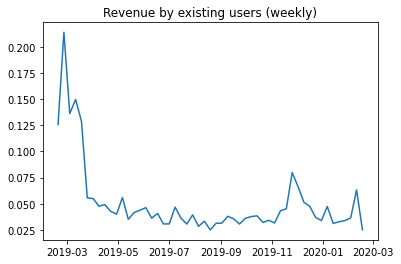

In [115]:
plt.plot(grouped_week2.rev_by_count)
plt.title('Revenue by existing users (weekly)')
plt.show()

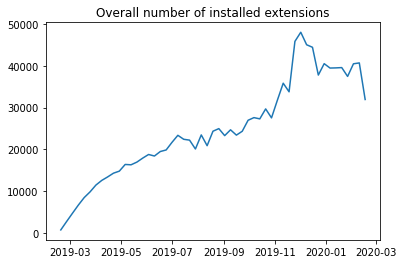

In [113]:
plt.plot(grouped_week2.inun_count)
plt.title('Overall number of installed extensions')
plt.show()

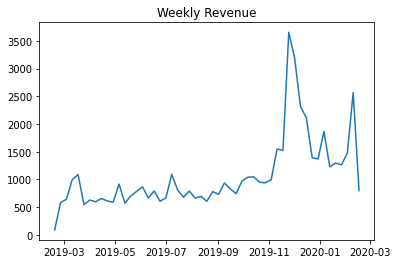

In [114]:
plt.plot(grouped_week2.total_rev_week)
plt.title('Weekly Revenue')
plt.show()